In [13]:
import matplotlib.pyplot as plt
from matplotlib import path as mlpPath
from matplotlib.patches import Polygon
import pandas as pd
import numpy as np
import math
import heapq

In [3]:
def get_landing_target(x:list, y:list)->list:
    prev_y = -1
    prev_x = -1
    left_x = 0
    right_x = 0
    for i in range(len(x)):
        land_x = x[i]
        land_y = y[i]

        if prev_y == land_y:
            target_x = prev_x + int((land_x - prev_x)/2)
            target_y = land_y
            left_x = prev_x
            right_x = land_x
        else:
            prev_y = land_y
            prev_x = land_x
    
    return [left_x, target_x, right_x, target_y]

In [4]:
def set_fly_zone(x:list, y:list)->Polygon:
    air_grid = [[0,2999]]
    
    for i in range(len(x)):
        air_grid.append([x[i], y[i]])

    air_grid.append([6999,2999])
    return Polygon(np.array(air_grid))

In [6]:
def draw_path(path:list, x:list, y:list, start:tuple):
    px = [n[0] for n in path]
    py = [n[1] for n in path]
    fig, ax = plt.subplots()
    ax.plot(x, y, marker='o', linestyle='-')
    ax.scatter(start[0], start[1], color='r')
    ax.plot(px, py, marker='o', linestyle='-', color='r')

In [7]:
x = [0, 300, 1000, 2000, 2500, 3700, 4700, 4750, 4700, 4000, 3700, 3750, 4000, 4900, 5100, 5500, 6200, 6999]
y = [1800, 1200, 1550, 1200, 1650, 220, 220, 1000, 1650, 1700, 1600, 1900, 2100, 2050, 1000, 500, 800, 600]
rocket_x, rocket_y = [6500, 2000]

In [8]:
left_x, target_x, right_x, target_y = get_landing_target(x, y)
target_y += 100
p = set_fly_zone(x, y)

In [9]:
def valid_loc(id: tuple, p: Polygon) -> bool:
    return p.contains_point(id)

In [10]:
def get_neighbors(id: tuple, p: Polygon) -> list:
    x, y = id
    step = 100
    neighbors = [(x+step, y), (x-step, y), (x, y-step), (x, y+step)] # E W N S
    # results = filter(self.in_bounds, neighbors)
    results = [n for n in neighbors if valid_loc(n, p)]
    return results

In [17]:
def heuristic(a: tuple, b: tuple) -> float:
    return math.dist(a, b)

In [18]:
def find_shortest_path(grid, start, end):
    # Store exploration of the graph in another graph.
    dist = {start: [start]}
    cost_so_far = {start: 0}

    # which neighbor did I explore ?
    q = []
    heapq.heappush(q, (0, start))
    
    while len(q):
        # Where am I ?
        at = heapq.heappop(q)[1]

        for next in get_neighbors(at, grid):
            # I don't want to explore twice the same node.
            new_cost = cost_so_far[at] + 1
            if next not in dist or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(next, end)
                # How did I get there ?
                dist[next] = dist[at] + [next]
                # Add newly explored node to the list.
                heapq.heappush(q, (priority, next))
                
            
            # In our case, we don't need to explore the whole graph.
            if next == end or heuristic(at, end) < 150:
                q.clear()
                break

    return dist.get(next)

In [19]:
path = find_shortest_path(p, (rocket_x, rocket_y), (target_x, target_y))

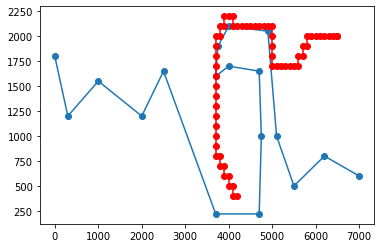

In [20]:
draw_path(path, x, y, (rocket_x, rocket_y))

In [21]:
def get_main_points(path):
    main_p = path[0]
    main_points = []
    for p in path:
        x0, y0 = main_p
        x1, y1 = p

        if abs(y1 - y0) > 0 and math.dist(main_p, p) > 2000:
            main_p = prev_p
            main_points.append(main_p)

        prev_p = (x1,y1)
    
    main_points.append(prev_p)
    return main_points

In [22]:
main_points = get_main_points(path)

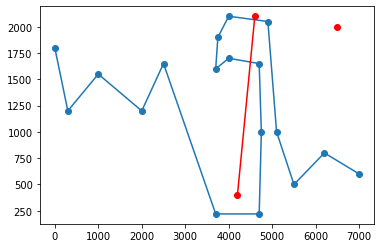

In [23]:
draw_path(main_points, x, y, (rocket_x, rocket_y))